## PHYS247-Summer 2021: Homework 1 solution

In [719]:
import numpy as np
import matplotlib.pylab as plt
from pylab import rcParams
rcParams['font.family'] = 'serif'
import time
from numpy import linalg as LA
import copy

### Part C)

In [720]:
Possible_move = {
  0: [0,0,0,0,0,0,0,0,1,0],
  1: [0,0,1,0,1,0,0,0,0,0],
  2: [0,1,0,1,0,1,0,0,0,0],
  3: [0,0,1,0,0,0,1,0,0,0],
  4: [0,1,0,0,0,1,0,1,0,0],
  5: [0,0,1,0,1,0,1,0,1,0],
  6: [0,0,0,1,0,1,0,0,0,1],
  7: [0,0,0,0,1,0,0,0,1,0],
  8: [1,0,0,0,0,1,0,1,0,1],
  9: [0,0,0,0,0,0,1,0,1,0],
}

In [721]:
A=list(Possible_move.values())
A

[[0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
 [0, 0, 1, 0, 1, 0, 0, 0, 0, 0],
 [0, 1, 0, 1, 0, 1, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0, 1, 0, 0, 0],
 [0, 1, 0, 0, 0, 1, 0, 1, 0, 0],
 [0, 0, 1, 0, 1, 0, 1, 0, 1, 0],
 [0, 0, 0, 1, 0, 1, 0, 0, 0, 1],
 [0, 0, 0, 0, 1, 0, 0, 0, 1, 0],
 [1, 0, 0, 0, 0, 1, 0, 1, 0, 1],
 [0, 0, 0, 0, 0, 0, 1, 0, 1, 0]]

In [722]:
v=[[1],[1],[1],[1],[1],[1],[1],[1],[1],[1]]

In [723]:
A_mat=np.matrix(A)
v_mat=np.matrix(v)

In [724]:
np.any(A_mat==A_mat.T)

True

### Part d)

In [725]:
def DialerProblem(S,N,A_=A_mat[:],v_=v_mat[:]):
    if N<2:
        return ('N should be >1')
    else:
        A=A_*v_
        t1=time.time()
        for i in range(N-2):
            A=A_*A
        t2=time.time()
    return (int(A[S]),(t2-t1)*1000)

In [726]:
print("DialerProblem(5,10)=",DialerProblem(5,10)[0], "and takes" ,DialerProblem(5,10)[1], "ms")

DialerProblem(5,10)= 18713 and takes 0.09608268737792969 ms


### Part e)

In [727]:
def MatrixMulti(A,B):
    """
    A function which computes matrix multiplication of the first 
    and second inputs. Inputs should be list-like.
    """
    
    if len(A[0])==len(B):
        R=[[sum(x*y for x,y in zip(A_row,B_col)) for B_col in zip(*B)] for A_row in A]
        return R
    else: 
        print('Matrix dimensions do not match')

In [728]:
def DialerProblem_no_numpy(S,N,A_=A[:],v_=v[:]):
    if N<2:
        return ('N should be >1')
    else:
        A=MatrixMulti(A_,v_)
        t1=time.time()
        for i in range(N-2):
            A=MatrixMulti(A_,A)
        t2=time.time()
    return (A[S][0],(t2-t1)*1000)

In [729]:
print("DialerProblem_no_numpy(5,10)=",DialerProblem_no_numpy(5,10)[0], "and takes" ,DialerProblem_no_numpy(5,10)[1], "ms")

DialerProblem_no_numpy(5,10)= 18713 and takes 0.19788742065429688 ms


### Part f)

In [730]:
N=np.arange(2,1001)
T=[]
for i in N:
    T.append(DialerProblem(5, i)[1])

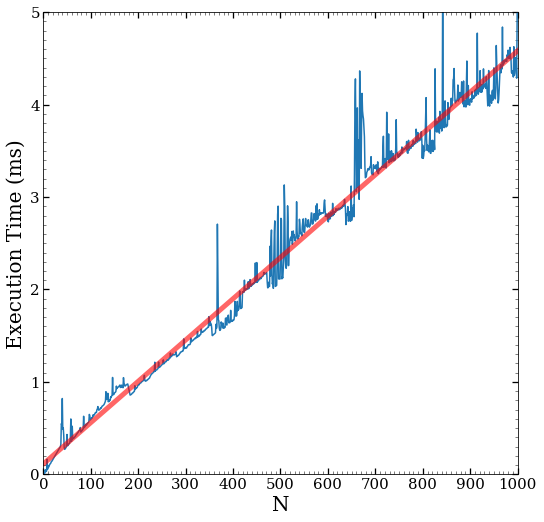

In [731]:
  
fig, ax = plt.subplots(1, 1,  figsize=(8.5,8.5))

xmajor = np.arange(0,1100,100)
xminor = np.arange(0,1100,10)

ymajor = np.arange(-1,10,1)
yminor = np.arange(-1,10,0.1)

ax.set_xticks(xmajor)
ax.set_xticks(xminor,minor=True)

ax.set_yticks(ymajor)
ax.set_yticks(yminor,minor=True)


plt.plot(N,T)
f_t=np.poly1d(np.polyfit(N,T,1))
plt.plot(N,f_t(N),linewidth=5,c='red',alpha=0.6)

ax.tick_params(which = 'major',direction='in',right='on',top='on',length=6,width=1.3,labelsize=16)
ax.tick_params(which = 'minor',direction='in',right='on',top='on',length=3,width=0.5)
ax.set_xlim(0,1000)
ax.set_ylim(0,5)


ax.set_ylabel('Execution Time (ms)',fontsize=20)
ax.set_xlabel('N',fontsize=20)

ax.tick_params(labelsize=15)
plt.show()

### Part g)

In [732]:
print("N=10000000 will take",f_t(10e7)/1000/60," minutes")

N=10000000 will take 7.451219163688284  minutes


### Part h)

In [733]:
def dec2bin(x):
        b=[]
        while (x>0):
            b.insert(0,x % 2)
            x=x // 2            
        return(b)

### Part i)

In [734]:
def DialerProblem_binary(S,N,A_=A_mat[:],v_=v_mat[:]):
    if N<2:
        return ('N should be >1')
    else:
        Dummy=copy.deepcopy(A_)

        if dec2bin(N-1)[-1]==1:
            v_=A_*v_
            
        t1=time.time()
        for i in reversed(dec2bin(N-1)[:-1]):
            Dummy*=Dummy
            if i==1:
                v_=Dummy*v_
        t2=time.time()
    return (int(v_[S]),(t2-t1)*1000)

In [735]:
print("DialerProblem_binary(5,10)=",DialerProblem_binary(5,10)[0], "and takes" ,DialerProblem_binary(5,10,A_mat,v_mat)[1], "ms")

DialerProblem_binary(5,10)= 18713 and takes 0.07009506225585938 ms


### Part j)

In [782]:
N=np.arange(2,1001)
T=[]
for i in N:
    T.append(DialerProblem_binary(5, i)[1])

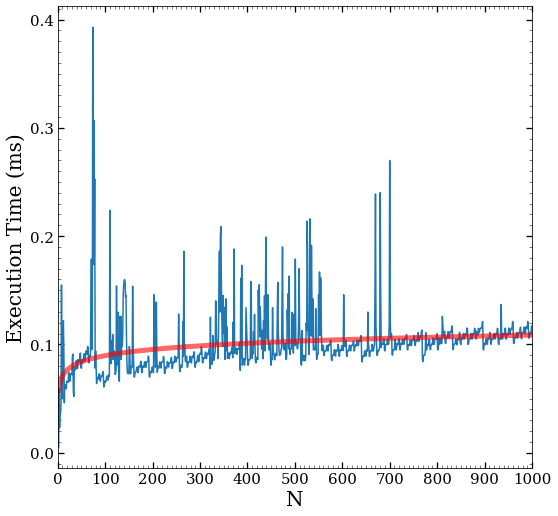

In [783]:
fig, ax = plt.subplots(1, 1,  figsize=(8.5,8.5))

xmajor = np.arange(0,1100,100)
xminor = np.arange(0,1100,10)

ymajor = np.arange(-1,10,0.1)
yminor = np.arange(-1,10,0.01)

ax.set_xticks(xmajor)
ax.set_xticks(xminor,minor=True)

ax.set_yticks(ymajor)
ax.set_yticks(yminor,minor=True)


plt.plot(N,T)
f_t=np.poly1d(np.polyfit(np.log(N),T,1))
plt.plot(N,f_t(np.log(N)),linewidth=5,c='red',alpha=0.6)

ax.tick_params(which = 'major',direction='in',right='on',top='on',length=6,width=1.3,labelsize=16)
ax.tick_params(which = 'minor',direction='in',right='on',top='on',length=3,width=0.5)
ax.set_xlim(0,1000)


ax.set_ylabel('Execution Time (ms)',fontsize=20)
ax.set_xlabel('N',fontsize=20)

ax.tick_params(labelsize=15)
plt.show()

### Part k)

In [756]:
print("N=10000000 will take",f_t(np.log(10e7)),"ms")

N=10000000 will take 0.33953820327735673 ms


## Problem2:

### Part a)

In [757]:
D=np.array([[1.72,-0.58,1.99,1.6,2.72,2.83,5.95,4.75,5.57,9.82],[0.1,0.31,1.54,4.97,2.43,3.59,7.71,7.63,5.6,7.91]])

### Part b)

In [758]:
cov_mat=np.cov(D)
eigen_values, eigen_vectors = LA.eig(cov_mat)

In [759]:
v0 = np.sqrt(eigen_values[0])*eigen_vectors[:,0]
v1 =np.sqrt(eigen_values[1])*eigen_vectors[:,1]
print(v0)
print(v1)

[-0.89141015  0.86153404]
[-2.81297197 -2.91051965]


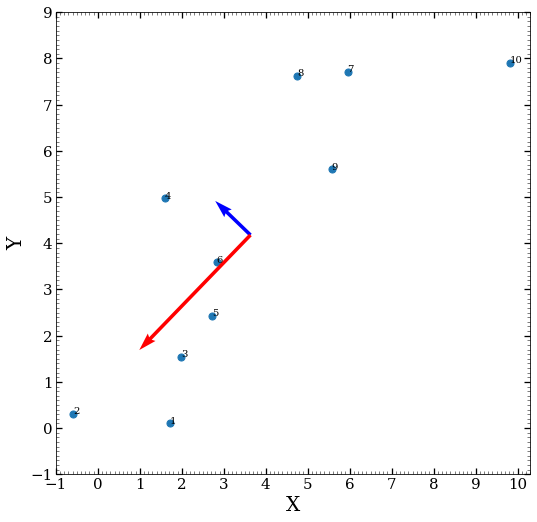

In [760]:
fig, ax = plt.subplots(1, 1,  figsize=(8.5,8.5))

xmajor = np.arange(-1,11,1)
xminor = np.arange(-1,11,0.1)

ymajor = np.arange(-1,11,1)
yminor = np.arange(-1,11,0.1)

ax.set_xticks(xmajor)
ax.set_xticks(xminor,minor=True)

ax.set_yticks(xmajor)
ax.set_yticks(xminor,minor=True)

ax.scatter(D[0],D[1],s=50)



origin = [np.mean(D[0]), np.mean(D[1])]
plt.quiver(*origin, v0[0],v0[1] , color=['b'], scale=12)
plt.quiver(*origin, v1[0],v1[1] , color=['r'], scale=12)

n=np.arange(10)
for i in n:
    ax.annotate(str(i+1), (D[0][i], D[1][i]))


ax.tick_params(which = 'major',direction='in',right='on',top='on',length=6,width=1.3,labelsize=16)
ax.tick_params(which = 'minor',direction='in',right='on',top='on',length=3,width=0.5)
ax.set_xlim(-1,10.3)
ax.set_ylim(-1,9)


ax.set_ylabel('Y',fontsize=20)
ax.set_xlabel('X',fontsize=20)

ax.tick_params(labelsize=15)
plt.show()

### PartC)

In [761]:
M=np.dot(D.T,v1)
print(M)

[ -5.12936375   0.72926265 -10.08001448 -18.96603782 -14.7238465
 -18.40947622 -39.17728972 -35.56888179 -31.9671639  -50.64559516]


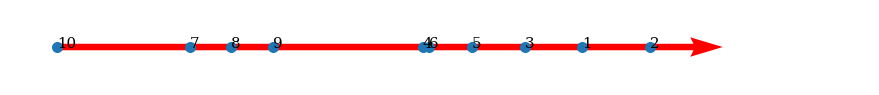

In [762]:
fig, ax = plt.subplots(1, 1,  figsize=(15.5,1.5))

origin=[np.min(M),0] 
d=[1,0]
ax.quiver(*origin, *d, color=['r'], scale=1.3)
ax.scatter(M,[0]*10,s=100)

for i in n:
    ax.annotate(str(i+1), (M[i], 0),fontsize=15)

ax.set_ylim(-0.01,0.01)
ax.set_xlim(-55,20)
ax.axis('off')
plt.show()